In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dlsfunctions as dls

In [2]:
r = 2.24e-9
diameter = r * 2 + 3e-9
sigma = 1e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

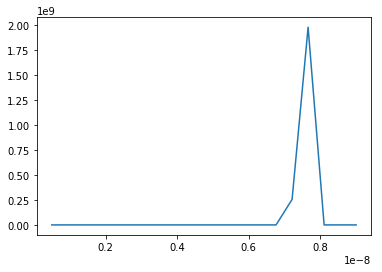

In [3]:
plt.plot(d, f_1)

In [4]:
theta_input = np.append(f_1, beta)

In [5]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)

In [10]:
ndim = 21
nwalkers = 100
nsteps = 4000

In [11]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [12]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [13]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

array([0.3695 , 0.3795 , 0.37725, 0.367  , 0.37875, 0.375  , 0.37225,
       0.3655 , 0.36175, 0.37525, 0.374  , 0.36775, 0.365  , 0.3665 ,
       0.36875, 0.3805 , 0.3705 , 0.36525, 0.37175, 0.378  , 0.3775 ,
       0.37325, 0.377  , 0.37325, 0.3765 , 0.374  , 0.365  , 0.37675,
       0.371  , 0.37375, 0.36875, 0.38475, 0.36125, 0.385  , 0.37325,
       0.362  , 0.37475, 0.372  , 0.37875, 0.37625, 0.37775, 0.367  ,
       0.3915 , 0.3745 , 0.37625, 0.373  , 0.373  , 0.37825, 0.36875,
       0.37425, 0.37425, 0.36625, 0.3685 , 0.37325, 0.353  , 0.36275,
       0.37875, 0.36625, 0.37   , 0.3665 , 0.373  , 0.37675, 0.372  ,
       0.366  , 0.37325, 0.377  , 0.3695 , 0.37925, 0.36175, 0.3815 ,
       0.37425, 0.385  , 0.36525, 0.3745 , 0.3745 , 0.35675, 0.358  ,
       0.3675 , 0.377  , 0.3865 , 0.3715 , 0.36825, 0.377  , 0.381  ,
       0.36475, 0.35875, 0.374  , 0.38125, 0.35575, 0.37   , 0.383  ,
       0.3875 , 0.367  , 0.369  , 0.37075, 0.371  , 0.3695 , 0.366  ,
       0.37525, 0.36

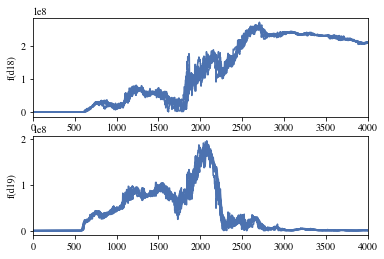

In [22]:
dls.view_burnin_plot(sampler, 18, 19)

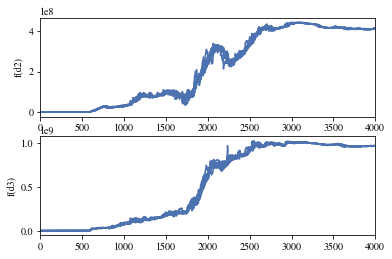

In [16]:
dls.view_burnin_plot(sampler, 2, 3)

In [17]:
samples = sampler.chain[:,3500:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [18]:
q

,beta,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),...,f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.16,0.921854,7.100337e+08,7.194272e+08,3.262244e+06,1.469322e+08,1.853190e+08,7.552302e+05,6.930057e+08,1.293482e+08,1.875480e+09,...,2.116569e+08,267553.058441,4.083916e+08,9.629240e+08,9.420438e+08,8.181863e+08,8.276664e+08,1.287389e+08,2.430353e+06,7.298455e+06
0.50,1.360488,7.133487e+08,7.235537e+08,6.906622e+06,1.575014e+08,1.896802e+08,1.573429e+06,6.962543e+08,1.373289e+08,1.881383e+09,...,2.215040e+08,528478.835864,4.108731e+08,9.670372e+08,9.516785e+08,8.241681e+08,8.376183e+08,1.364107e+08,1.136241e+07,1.012675e+07
0.84,1.669145,7.282190e+08,7.461986e+08,2.432805e+07,1.609149e+08,1.933765e+08,5.477252e+06,7.061507e+08,1.494334e+08,1.886244e+09,...,2.305706e+08,880310.921405,4.169794e+08,9.813412e+08,9.722992e+08,8.308785e+08,8.943191e+08,1.413308e+08,2.425465e+07,1.606484e+07


In [19]:
q_50 = q.quantile([0.5], axis=0)
q_50_array = q_50.values
q_50_array = q_50_array.flatten()

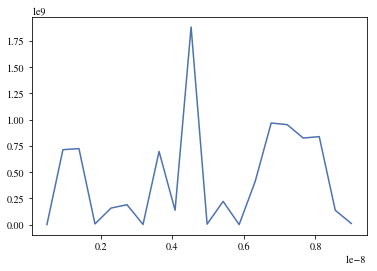

In [20]:
plt.plot(d, q_50_array[0:20])

ndim = 21
nwalkers = 100
nsteps = 4000

start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

start_pos1 = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler1 = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

result1 = sampler1.run_mcmc(start_pos1, nsteps)
sampler1.acceptance_fraction

plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler1.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler1.chain[j, :, 1], ax=ax1)

samples = sampler1.chain[:,3500:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19], 'beta': traces[20]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

q

q_50 = q.quantile([0.5], axis=0)
q_50_array = q_50.values
q_50_array = q_50_array.flatten()

plt.plot(d, q_50_array[0:20])

infer_g2 = dls.g2(np.append(q_50_array, 1.711), d, m, gamma, time_in)
plt.semilogx(time_in, infer_g2 - sim_data)

plt.plot(d, f_1 - q_50_array[0:20])